In [1]:
import pandas as pd


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
pd.__version__

'2.2.3'

In [4]:
# Loading Dataset

data = pd.read_csv("netflix1.csv")

In [5]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [7]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [8]:
data.shape

(8790, 10)

In [9]:
data=data.drop_duplicates()

In [10]:
# Content distribution on Netflix

data['type'].value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

Text(0.5, 0.98, 'Total Content on Netflix')

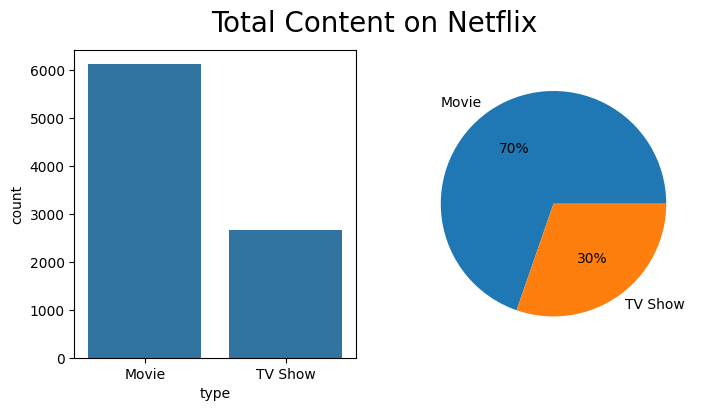

In [11]:
freq=data['type'].value_counts()
fig, axes=plt.subplots(1,2, figsize=(8, 4))
sns.countplot(data, x=data['type'], ax=axes[0])
plt.pie(freq, labels=['Movie', 'TV Show'], autopct='%.0f%%')
plt.suptitle('Total Content on Netflix', fontsize=20)

In [12]:
# Rating

data['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

Text(0.5, 0.98, 'Rating on Netflix')

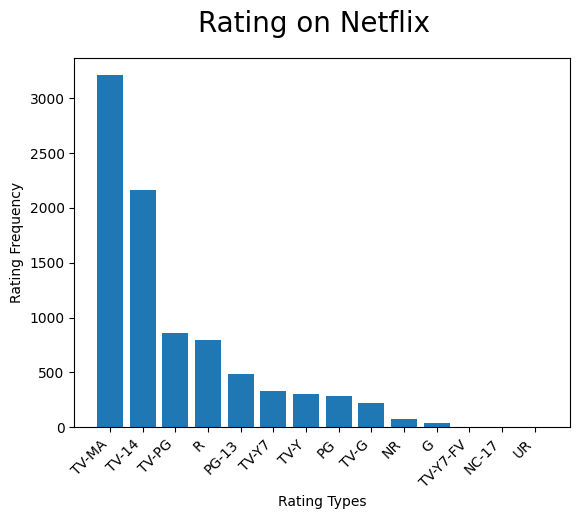

In [13]:
ratings=data['rating'].value_counts().reset_index().sort_values(by='count', ascending=False)
plt.bar(ratings['rating'], ratings['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Rating Types")
plt.ylabel("Rating Frequency")
plt.suptitle('Rating on Netflix', fontsize=20)

Text(0.5, 0.98, 'Rating on Netflix')

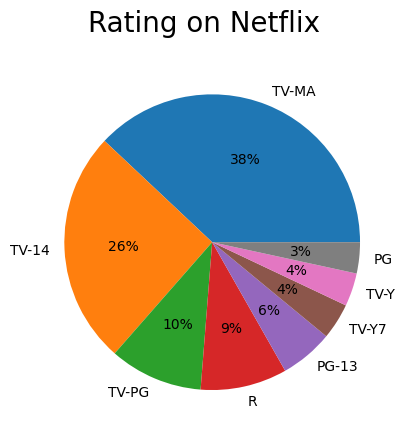

In [14]:
plt.pie(ratings['count'][:8], labels=ratings['rating'][:8],
autopct='%.0f%%')
plt.suptitle('Rating on Netflix', fontsize=20)

In [15]:
data[["rating"]]

,rating
0,PG-13
1,TV-MA
2,TV-MA
3,TV-PG
4,TV-MA
...,...
8785,TV-PG
8786,TV-Y7
8787,TV-PG
8788,TV-Y


In [16]:
data.drop(columns="rating")

,show_id,type,title,director,country,date_added,release_year,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,1 Season,Kids' TV


In [17]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [18]:
new_column_names = []
for i in data.columns:
    new_column_names.append(i.capitalize())

In [19]:
new_column_names

['Show_id',
 'Type',
 'Title',
 'Director',
 'Country',
 'Date_added',
 'Release_year',
 'Rating',
 'Duration',
 'Listed_in']

In [20]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [21]:
"""Deleting redundant columns.
Renaming the columns.
Remove the Non values from the dataset
check for some more Transformation"""

'Deleting redundant columns.\nRenaming the columns.\nRemove the Non values from the dataset\ncheck for some more Transformation'

In [22]:
data.duplicated().sum()

np.int64(0)

In [23]:
data.isna()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
8785,False,False,False,False,False,False,False,False,False,False
8786,False,False,False,False,False,False,False,False,False,False
8787,False,False,False,False,False,False,False,False,False,False
8788,False,False,False,False,False,False,False,False,False,False


In [24]:
data.dropna(inplace=True)

In [25]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [26]:
data["show_id"].unique()

array(['s1', 's3', 's6', ..., 's8801', 's8784', 's8786'],
      shape=(8790,), dtype=object)

In [27]:
data["show_id"].apply(lambda x: x.split("s")[1])

0          1
1          3
2          6
3         14
4          8
        ... 
8785    8797
8786    8798
8787    8801
8788    8784
8789    8786
Name: show_id, Length: 8790, dtype: object

In [28]:
data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


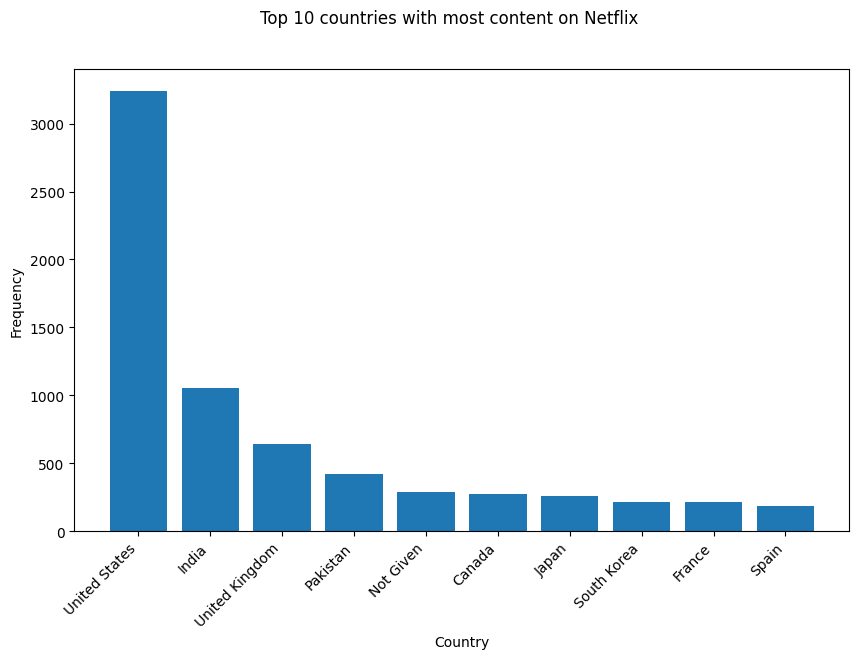

In [29]:
# Top 10 countries with most content on Netflix

top_ten_countries=data['country'].value_counts().reset_index().sort_values(by='count', ascending=False)[:10]
plt.figure(figsize=(10, 6))
plt.bar(top_ten_countries['country'],
top_ten_countries['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.suptitle("Top 10 countries with most content on Netflix")
plt.show()

In [30]:
# Monthly releases of Movies and TV shows on Netflix

data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')  # Handle NaN values
data['year'] = data['date_added'].dt.year
data['month'] = data['date_added'].dt.month
data['day'] = data['date_added'].dt.day

In [31]:
monthly_movie_release = data[data['type'] == 'Movie']['month'].value_counts().sort_index()
monthly_series_release = data[data['type'] == 'TV Show']['month'].value_counts().sort_index()

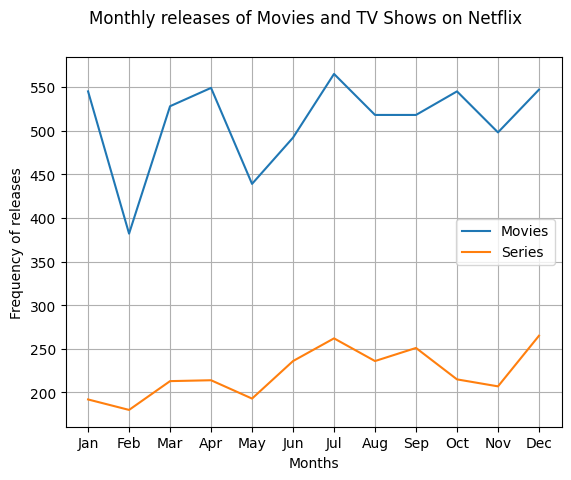

In [32]:
plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies')
plt.plot(monthly_series_release.index, monthly_series_release.values, label='Series')
plt.xlabel("Months")
plt.ylabel("Frequency of releases")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.suptitle("Monthly releases of Movies and TV Shows on Netflix")
plt.show()

In [33]:
# Yearly releases of Movies and TV Shows on Netflix

data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
data['year'] = data['date_added'].dt.year

In [34]:
yearly_movie_releases = data[data['type'] == 'Movie']['year'].value_counts().sort_index()
yearly_series_releases = data[data['type'] == 'TV Show']['year'].value_counts().sort_index()

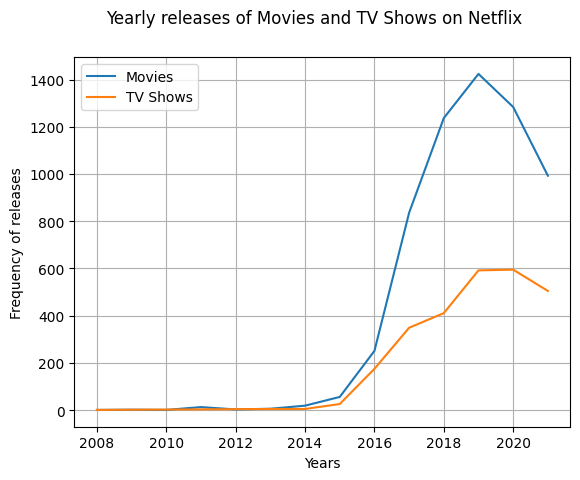

In [35]:
plt.plot(yearly_movie_releases.index, yearly_movie_releases.values, label='Movies')
plt.plot(yearly_series_releases.index, yearly_series_releases.values, label='TV Shows')
plt.xlabel("Years")
plt.ylabel("Frequency of releases")
plt.grid(True)
plt.suptitle("Yearly releases of Movies and TV Shows on Netflix")
plt.legend()
plt.show()

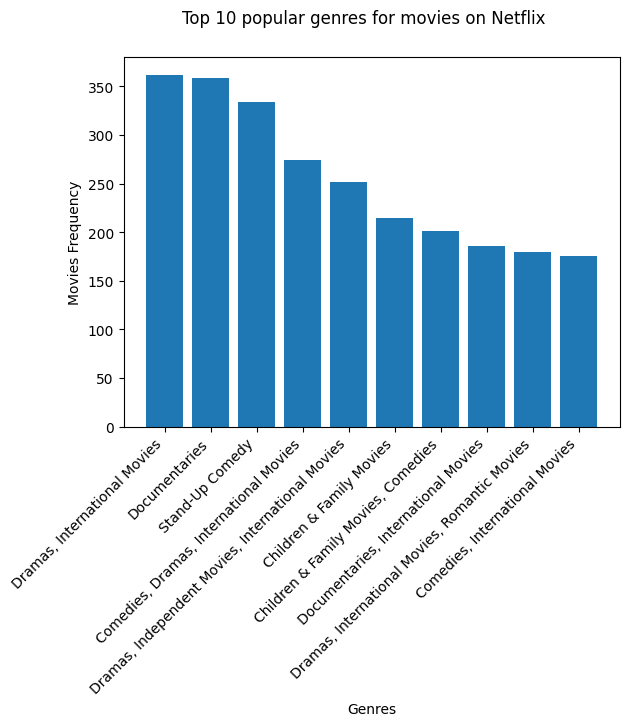

In [36]:
# Top 10 popular movie genres

popular_movie_genre=data[data['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]
popular_series_genre=data[data['type']=='TVShow'].groupby("listed_in").size().sort_values(ascending=False)[:10]

plt.bar(popular_movie_genre.index, popular_movie_genre.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Movies Frequency")
plt.suptitle("Top 10 popular genres for movies on Netflix")
plt.show()

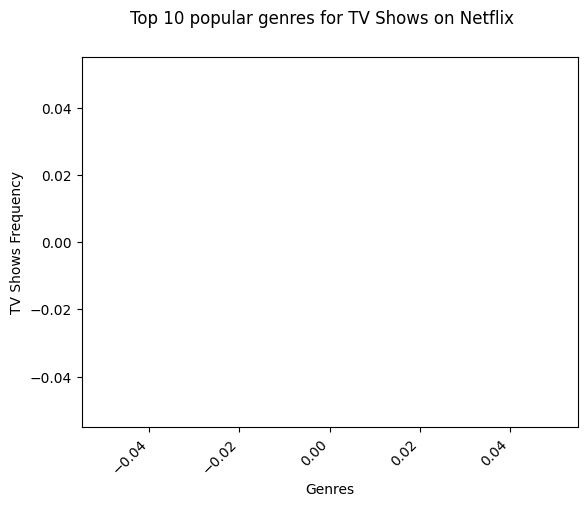

In [37]:
# Top 10 TV Shows genres

plt.bar(popular_series_genre.index,
popular_series_genre.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("TV Shows Frequency")
plt.suptitle("Top 10 popular genres for TV Shows on Netflix")
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Rajiv Chilaka'),
  Text(1, 0, 'Alastair Fothergill'),
  Text(2, 0, 'Raúl Campos, Jan Suter'),
  Text(3, 0, 'Marcus Raboy'),
  Text(4, 0, 'Suhas Kadav'),
  Text(5, 0, 'Jay Karas'),
  Text(6, 0, 'Cathy Garcia-Molina'),
  Text(7, 0, 'Jay Chapman'),
  Text(8, 0, 'Martin Scorsese'),
  Text(9, 0, 'Youssef Chahine'),
  Text(10, 0, 'Steven Spielberg'),
  Text(11, 0, 'Mark Thornton, Todd Kauffman'),
  Text(12, 0, 'Don Michael Paul'),
  Text(13, 0, 'David Dhawan')])

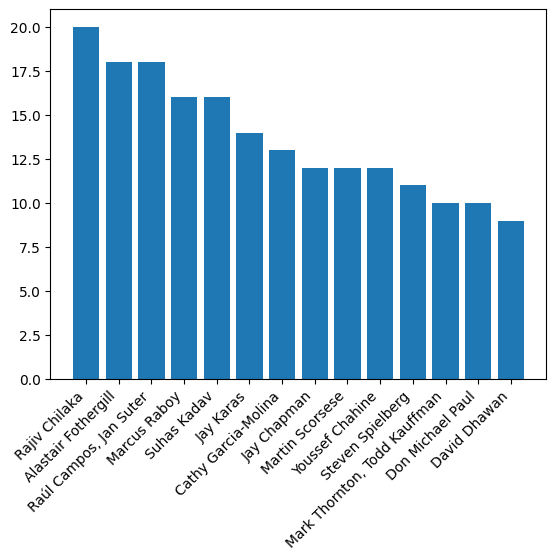

In [38]:
# Top 15 directors across Netflix with hoigh frequency of movies and shows.

directors=data['director'].value_counts().reset_index().sort_values(by='count', ascending=False)[1:15]
plt.bar(directors['director'], directors['count'])
plt.xticks(rotation=45, ha='right')

In [39]:
# Cleaning Data
data["Date_added"] = data["date_added"].apply(lambda x: str(x).replace("/", "-") if not pd.isnull(x) else x)

 

In [40]:
data.to_csv("cleaned_Data_CSV.csv",index = False)

In [41]:
data.to_excel("Cleaned_Data_Excel.xlsx", index = False)